In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys 

In [ ]:
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/utils')
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/models')

In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/

/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning


In [ ]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/utils',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/models',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/utils',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/models',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/utils',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/models',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/utils',
 '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/models',
 '/content/gdrive/My Drive/Colab Notebooks/Generative

In [ ]:
#import import_ipynb
import loaders
import AE
import os

In [ ]:
PATH = '/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/'
os.path.join(PATH)

'/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/'

In [ ]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = PATH
RUN_FOLDER += 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

print(RUN_FOLDER)
print(os.path.exists(RUN_FOLDER))
if not os.path.exists(RUN_FOLDER):
    os.makedir(RUN_FOLDER)
    os.makedir(os.path.join(RUN_FOLDER, 'viz'))
    os.makedir(os.path.join(RUN_FOLDER, 'images'))
    os.makedir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

/content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/run/vae/0001_digits
True


In [ ]:
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from keras.models import Model
from keras import backend as K

In [ ]:
#test_layer = Conv2D()

In [ ]:
AE = AE.Autoencoder( ##첫번째 layer -> 32개의 필터개수 필터사이즈는 3*3인듯 
    input_dim=(28,28,1),
    encoder_conv_filters = [32,64,64,64],
    encoder_conv_kernel_size =[3,3,3,3],
    encoder_conv_strides=[1,2,2,1],
    decoder_conv_t_filters=[64,64,32,1],
    decoder_conv_t_kernel_size = [3,3,3,3],
    decoder_conv_t_strides=[1,2,2,1],
    z_dim = 2    
)
if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [ ]:
AE.encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 7, 7, 64)          0   

In [ ]:
AE.decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0   

In [ ]:
(x_train, y_train), (x_test, y_test) = loaders.load_mnist()

In [ ]:
## 이제 AUTO ENCODER Training gogo
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0
AE.compile(LEARNING_RATE)

In [ ]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1834

Epoch 00001: saving model to /content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/run/vae/0001_digits/weights/weights.h5
Epoch 2/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0905

Epoch 00002: saving model to /content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/run/vae/0001_digits/weights/weights.h5
Epoch 3/200
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0689

Epoch 00003: saving model to /content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/run/vae/0001_digits/weights/weights.h5
Epoch 4/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0638

Epoch 00004: saving model to /content/gdrive/My Drive/Colab Notebooks/Generative Deep Learning/run/vae/0001_digits/weights/weights.h5
Epoch 5/200
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0600

Epoch 00005: saving model to /content/g

In [74]:
## AutoEncoder 제대로 됫는지 분석 ㄱㄱ 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm

In [75]:
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

In [76]:
## 현재 있는 AE로 ㄱㄱ 
AE

##원래는 저장된 애 가져와야함 
#AE = load_model(Autoencoder, RUN_FOLDER)

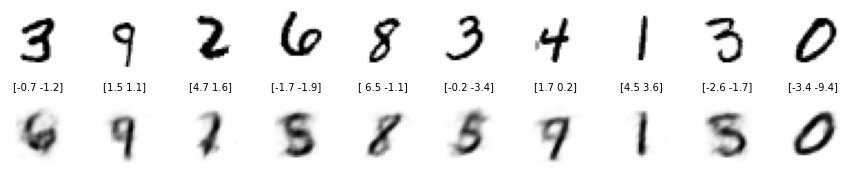

In [77]:
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

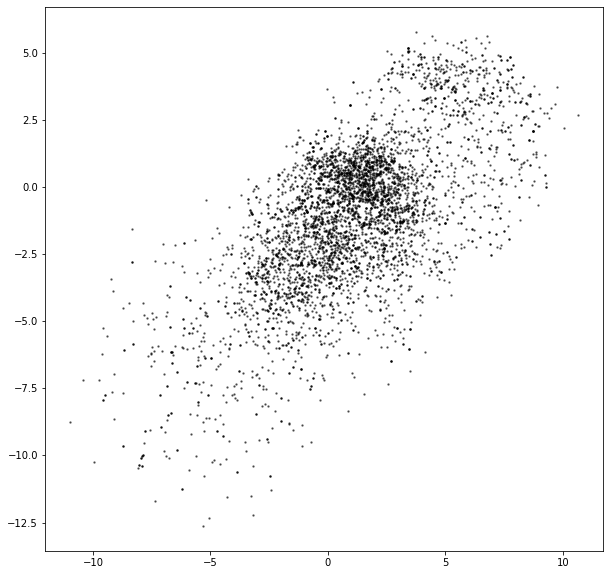

In [78]:
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()

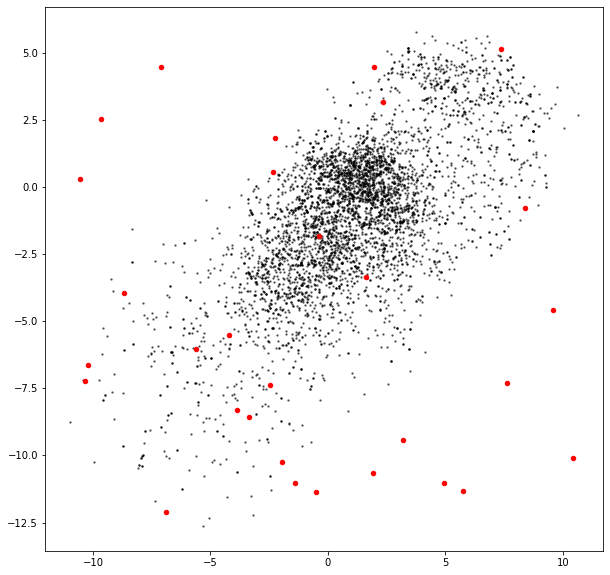

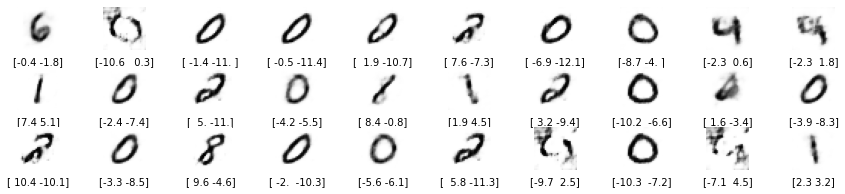

In [79]:
grid_size = 15
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c='red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

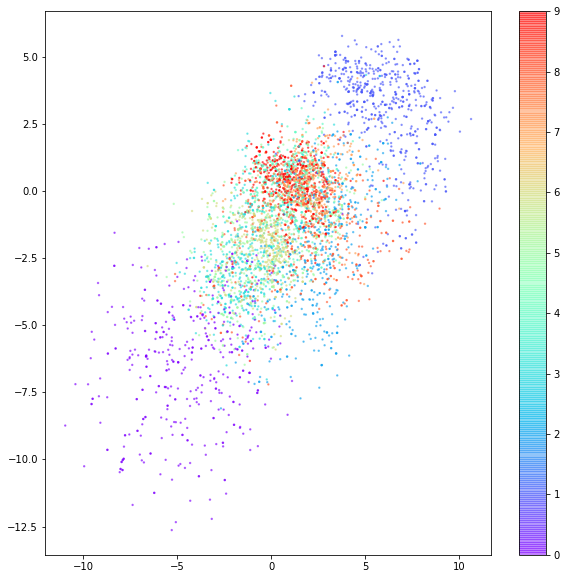

In [80]:
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

plt.show()